In [161]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt

In [120]:
# CONSTANTS
FEATURE_1 = 'X1'
FEATURE_2 = 'X2'
CLASS_LABEL_COLUMN_NAME = 'Y'
COLUMN_NAMES = [FEATURE_1, FEATURE_2, CLASS_LABEL_COLUMN_NAME] # Assumption is all text files have only 2 features 

In [121]:
def read_csv(file_name, column_names):
    return pd.read_csv(file_name, sep=' ', header=None, names=column_names)

In [122]:
Dbig_dataset = read_csv(file_name = 'Dbig.txt', column_names = COLUMN_NAMES)

In [123]:
Dbig_permutation = Dbig_dataset.iloc[np.random.RandomState(seed = 3).permutation(len(Dbig_dataset))].reset_index(drop=True)

In [124]:
Dbig_train = Dbig_permutation[0:8192]

In [125]:
Dbig_test = Dbig_permutation[8192:]

In [126]:
D32 = Dbig_train[0:32]
D32_X = D32.loc[:, D32.columns != 'Y']
D32_Y = D32.loc[:, D32.columns == 'Y']

D128 = Dbig_train[:128]
D128_X = D128.loc[:, D128.columns != 'Y']
D128_Y = D128.loc[:, D128.columns == 'Y']

D512 = Dbig_train[:512]
D512_X = D512.loc[:, D512.columns != 'Y']
D512_Y = D512.loc[:, D512.columns == 'Y']

D2048 = Dbig_train[:2048]
D2048_X = D2048.loc[:, D2048.columns != 'Y']
D2048_Y = D2048.loc[:, D2048.columns == 'Y']

D8192 = Dbig_train[:]
D8192_X = D8192.loc[:, D8192.columns != 'Y']
D8192_Y = D8192.loc[:, D8192.columns == 'Y']

test_X = Dbig_test.loc[:, Dbig_test.columns != 'Y']
test_Y = Dbig_test.loc[:, Dbig_test.columns == 'Y']

In [127]:
D32_d3 = DecisionTreeClassifier(criterion = "entropy").fit(D32_X, D32_Y)

[Text(0.3333333333333333, 0.875, 'X[1] <= -0.65\nentropy = 0.997\nsamples = 32\nvalue = [17, 15]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.5, 0.625, 'X[0] <= -1.092\nentropy = 0.871\nsamples = 24\nvalue = [17, 7]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.6666666666666666, 0.375, 'X[0] <= 1.071\nentropy = 0.485\nsamples = 19\nvalue = [17, 2]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]')]

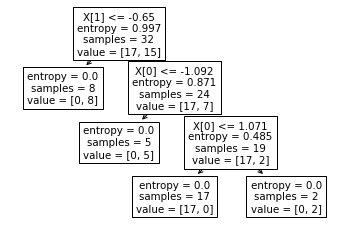

In [128]:
plot_tree(D32_d3)

In [129]:
D32_pred = D32_d3.predict(test_X)

In [130]:
D32_accuracy = metrics.accuracy_score(test_Y, D32_pred)
D32_accuracy

0.8506637168141593

In [149]:
n32 = D32_d3.tree_.node_count
n32

7

In [131]:
D128_d3 = DecisionTreeClassifier(criterion = "entropy").fit(D128_X, D128_Y)

[Text(0.5555555555555556, 0.9444444444444444, 'X[1] <= -0.705\nentropy = 1.0\nsamples = 128\nvalue = [63, 65]'),
 Text(0.4444444444444444, 0.8333333333333334, 'entropy = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(0.6666666666666666, 0.8333333333333334, 'X[0] <= -1.063\nentropy = 0.946\nsamples = 99\nvalue = [63, 36]'),
 Text(0.5555555555555556, 0.7222222222222222, 'entropy = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.7777777777777778, 0.7222222222222222, 'X[1] <= 1.199\nentropy = 0.797\nsamples = 83\nvalue = [63, 20]'),
 Text(0.6666666666666666, 0.6111111111111112, 'X[0] <= 1.077\nentropy = 0.576\nsamples = 73\nvalue = [63, 10]'),
 Text(0.5555555555555556, 0.5, 'X[0] <= -0.112\nentropy = 0.379\nsamples = 68\nvalue = [63, 5]'),
 Text(0.4444444444444444, 0.3888888888888889, 'X[1] <= -0.304\nentropy = 0.691\nsamples = 27\nvalue = [22, 5]'),
 Text(0.2222222222222222, 0.2777777777777778, 'X[0] <= -0.547\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(0.1111111111111111, 0.166666666

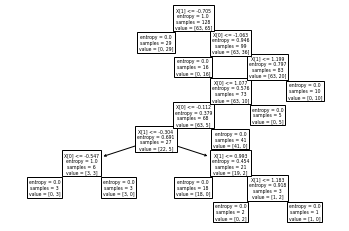

In [132]:
plot_tree(D128_d3)

In [133]:
D128_pred = D128_d3.predict(test_X)

In [134]:
D128_accuracy = metrics.accuracy_score(test_Y, D128_pred)
D128_accuracy

0.9231194690265486

In [151]:
n128 = D128_d3.tree_.node_count
n128

19

In [135]:
D512_d3 = DecisionTreeClassifier(criterion = "entropy").fit(D512_X, D512_Y)

[Text(0.296875, 0.9583333333333334, 'X[1] <= -0.645\nentropy = 0.983\nsamples = 512\nvalue = [217, 295]'),
 Text(0.0625, 0.875, 'X[1] <= -0.885\nentropy = 0.314\nsamples = 141\nvalue = [8, 133]'),
 Text(0.03125, 0.7916666666666666, 'entropy = 0.0\nsamples = 91\nvalue = [0, 91]'),
 Text(0.09375, 0.7916666666666666, 'X[0] <= -0.239\nentropy = 0.634\nsamples = 50\nvalue = [8, 42]'),
 Text(0.0625, 0.7083333333333334, 'entropy = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.125, 0.7083333333333334, 'X[0] <= 0.205\nentropy = 0.89\nsamples = 26\nvalue = [8, 18]'),
 Text(0.09375, 0.625, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.15625, 0.625, 'entropy = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.53125, 0.875, 'X[1] <= 1.221\nentropy = 0.988\nsamples = 371\nvalue = [209, 162]'),
 Text(0.5, 0.7916666666666666, 'X[0] <= 1.142\nentropy = 0.923\nsamples = 316\nvalue = [209, 107]'),
 Text(0.46875, 0.7083333333333334, 'X[0] <= -1.014\nentropy = 0.8\nsamples = 276\nvalue = [209, 67]'),


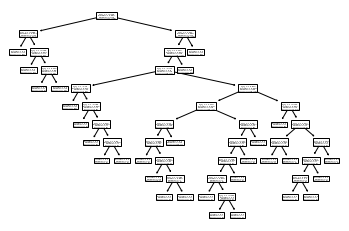

In [136]:
plot_tree(D512_d3)

In [137]:
D512_pred = D512_d3.predict(test_X)

In [138]:
D512_accuracy = metrics.accuracy_score(test_Y, D512_pred)
D512_accuracy

0.952433628318584

In [153]:
n512 = D512_d3.tree_.node_count
n512

57

In [139]:
D2048_d3 = DecisionTreeClassifier(criterion = "entropy").fit(D2048_X, D2048_Y)

[Text(0.32710597826086957, 0.9666666666666667, 'X[1] <= -0.71\nentropy = 0.973\nsamples = 2048\nvalue = [826, 1222]'),
 Text(0.043478260869565216, 0.9, 'X[1] <= -0.955\nentropy = 0.28\nsamples = 537\nvalue = [26, 511]'),
 Text(0.021739130434782608, 0.8333333333333334, 'entropy = 0.0\nsamples = 357\nvalue = [0, 357]'),
 Text(0.06521739130434782, 0.8333333333333334, 'X[0] <= 0.294\nentropy = 0.596\nsamples = 180\nvalue = [26, 154]'),
 Text(0.043478260869565216, 0.7666666666666667, 'X[0] <= -0.178\nentropy = 0.811\nsamples = 104\nvalue = [26, 78]'),
 Text(0.021739130434782608, 0.7, 'entropy = 0.0\nsamples = 75\nvalue = [0, 75]'),
 Text(0.06521739130434782, 0.7, 'X[1] <= -0.872\nentropy = 0.48\nsamples = 29\nvalue = [26, 3]'),
 Text(0.043478260869565216, 0.6333333333333333, 'X[0] <= 0.099\nentropy = 0.881\nsamples = 10\nvalue = [7, 3]'),
 Text(0.021739130434782608, 0.5666666666666667, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.06521739130434782, 0.5666666666666667, 'entropy = 0

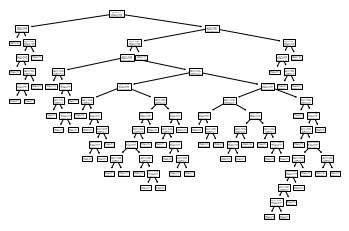

In [140]:
plot_tree(D2048_d3)

In [141]:
D2048_pred = D2048_d3.predict(test_X)

In [142]:
D2048_accuracy = metrics.accuracy_score(test_Y, D2048_pred)
D2048_accuracy

0.9778761061946902

In [155]:
n2048 = D2048_d3.tree_.node_count
n2048

103

In [143]:
D8192_d3 = DecisionTreeClassifier(criterion = "entropy").fit(D8192_X, D8192_Y)

[Text(0.3597928779069767, 0.9705882352941176, 'X[1] <= -0.712\nentropy = 0.971\nsamples = 8192\nvalue = [3280, 4912]'),
 Text(0.05813953488372093, 0.9117647058823529, 'X[1] <= -0.926\nentropy = 0.233\nsamples = 2181\nvalue = [83, 2098]'),
 Text(0.018604651162790697, 0.8529411764705882, 'X[1] <= -0.955\nentropy = 0.008\nsamples = 1585\nvalue = [1, 1584]'),
 Text(0.009302325581395349, 0.7941176470588235, 'entropy = 0.0\nsamples = 1519\nvalue = [0, 1519]'),
 Text(0.027906976744186046, 0.7941176470588235, 'X[1] <= -0.955\nentropy = 0.113\nsamples = 66\nvalue = [1, 65]'),
 Text(0.018604651162790697, 0.7352941176470589, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.037209302325581395, 0.7352941176470589, 'entropy = 0.0\nsamples = 65\nvalue = [0, 65]'),
 Text(0.09767441860465116, 0.8529411764705882, 'X[0] <= 0.322\nentropy = 0.578\nsamples = 596\nvalue = [82, 514]'),
 Text(0.08837209302325581, 0.7941176470588235, 'X[0] <= -0.213\nentropy = 0.776\nsamples = 358\nvalue = [82, 276]'),
 

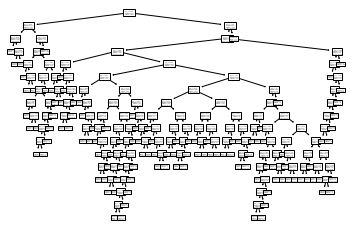

In [144]:
plot_tree(D8192_d3)

In [145]:
D8192_pred = D8192_d3.predict(test_X)

In [146]:
D8192_accuracy = metrics.accuracy_score(test_Y, D8192_pred)
D8192_accuracy

0.9889380530973452

In [157]:
n8192 = D8192_d3.tree_.node_count
n8192

229

In [171]:
n = [n32, n128, n512, n2048, n8192]
acc = [D32_accuracy, D128_accuracy, D512_accuracy, D2048_accuracy, D8192_accuracy]
err = [1-D32_accuracy, 1-D128_accuracy, 1-D512_accuracy, 1-D2048_accuracy, 1-D8192_accuracy]

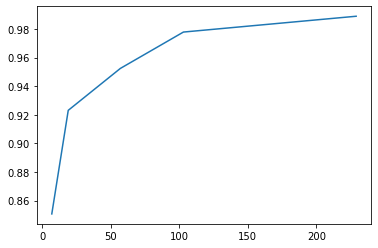

In [172]:
plt.plot(n, acc) # n vs accuracy

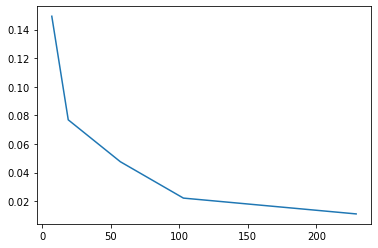

In [173]:
plt.plot(n, err)

In [174]:
err

[0.1493362831858407,
 0.07688053097345138,
 0.047566371681415975,
 0.02212389380530977,
 0.011061946902654829]

In [175]:
n

[7, 19, 57, 103, 229]